In [3]:
import os
import random
import  cv2
import matplotlib.pyplot as plt
from collections import  Counter

# Set working directory to project root (go up one level from notebooks folder)
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('..')
print(f"Current working directory: {os.getcwd()}")

Current working directory: c:\shivraj\document-ai


In [2]:
datasets={
    "card_detection":"datasets/card_detection",
    "aadhar_fields":"datasets/aadhar_fields",
    "pan_fields":"datasets/pan_fields",
    "voter_fields":"datasets/voter_fields"
}

In [4]:
def load_yolo_labels(label_dir):
    labels=[]
    for file in os.listdir(label_dir):
        if file.endswith(".txt"):
            with open(os.path.join(label_dir,file)) as f:
                for line in f:
                    cls=int(line.split()[0])
                    labels.append(cls)
    return labels

In [5]:
def analyze_dataset(name,dataset_path):
    print(f"\n Dataset:{name}")

    label_dir=os.path.join(dataset_path,"labels","train")
    if not os.path.exists(label_dir):
        print("labels/train not found")
        return
    
    labels=load_yolo_labels(label_dir)
    counter=Counter(labels)

    print("Class distribution:")
    for cls,count in counter.items():
        print(f" class {cls}:{counter}")
    
    plt.figure(figsize=(5,3))
    plt.bar(counter.keys(),counter.values())
    plt.title(f"{name} - class Distribution")
    plt.xlabel("Class ID")
    plt.ylabel("Count")
    plt.show()


 Dataset:card_detection
Class distribution:
 class 1:Counter({0: 1851, 2: 891, 1: 119})
 class 0:Counter({0: 1851, 2: 891, 1: 119})
 class 2:Counter({0: 1851, 2: 891, 1: 119})


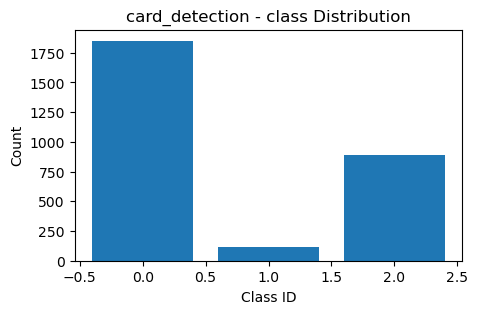


 Dataset:aadhar_fields
labels/train not found

 Dataset:pan_fields
labels/train not found

 Dataset:voter_fields
labels/train not found


In [6]:
for name,path in datasets.items():
    analyze_dataset(name,path)

In [7]:
def visualize_random_samples(dataset_path, n=3):
    # Convert to absolute path to avoid issues with working directory
    dataset_path = os.path.abspath(dataset_path)
    img_dir = os.path.join(dataset_path, "images")
    label_dir = os.path.join(dataset_path, "labels")

    # Check if directories exist
    if not os.path.exists(img_dir):
        raise FileNotFoundError(f"Images directory not found: {img_dir}")
    if not os.path.exists(label_dir):
        print(f"Warning: Labels directory not found: {label_dir}")

    images = [f for f in os.listdir(img_dir) if f.endswith((".jpg", ".png"))]
    
    if not images:
        raise ValueError(f"No images found in {img_dir}")

    for _ in range(n):
        img_name = random.choice(images)
        img_path = os.path.join(img_dir, img_name)
        label_path = os.path.join(label_dir, img_name.replace(".jpg", ".txt").replace(".png", ".txt"))

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w = img.shape[:2]

        if os.path.exists(label_path):
            with open(label_path) as f:
                for line in f:
                    cls, xc, yc, bw, bh = map(float, line.split())
                    x1 = int((xc - bw/2) * w)
                    y1 = int((yc - bh/2) * h)
                    x2 = int((xc + bw/2) * w)
                    y2 = int((yc + bh/2) * h)
                    cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)
                    cv2.putText(img, str(int(cls)), (x1, y1-5),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), 2)

        plt.figure(figsize=(4,4))
        plt.imshow(img)
        plt.axis("off")
        plt.show()


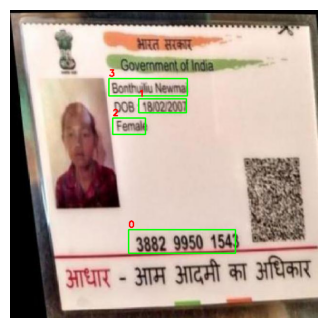

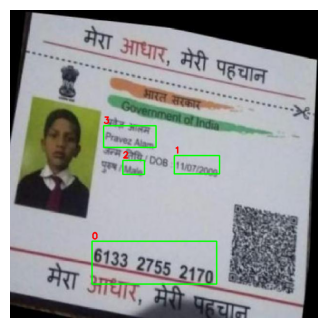

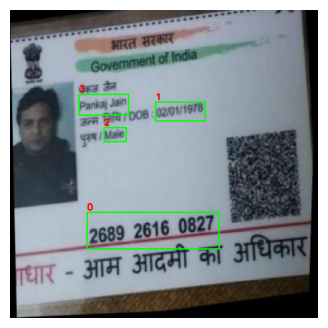

In [8]:
visualize_random_samples("datasets/aadhar_fields/test", n=3)


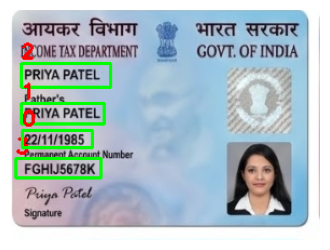

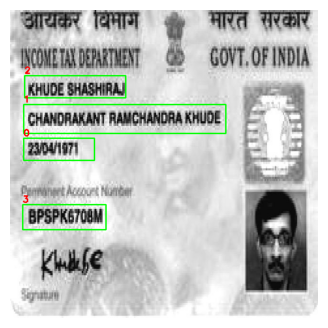

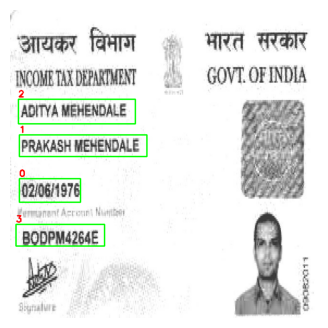

In [9]:
visualize_random_samples("datasets/pan_fields//test", n=3)


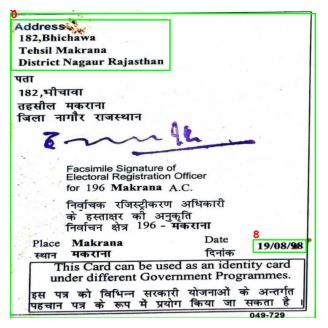

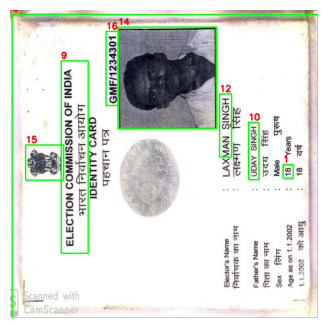

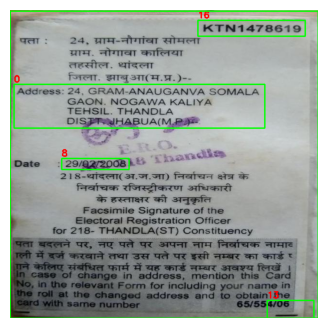

In [10]:
visualize_random_samples("datasets/voter_fields//test", n=3)
